In [26]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = os.path.join('.', 'results')

In [23]:
csv_files = glob.glob(os.path.join(DATA_DIR, '*', '*.csv'))

graph_info = {}
for file in csv_files:
    df = pd.read_csv(file)
    relative_error = df['relative_error_avg'].mean()

    option = os.path.basename(os.path.dirname(file))

    file_name = os.path.basename(file)
    alpha = float(file_name.split('_')[1][:-4])

    if option not in graph_info:
        graph_info[option] = []
    graph_info[option].append((alpha, relative_error))
    

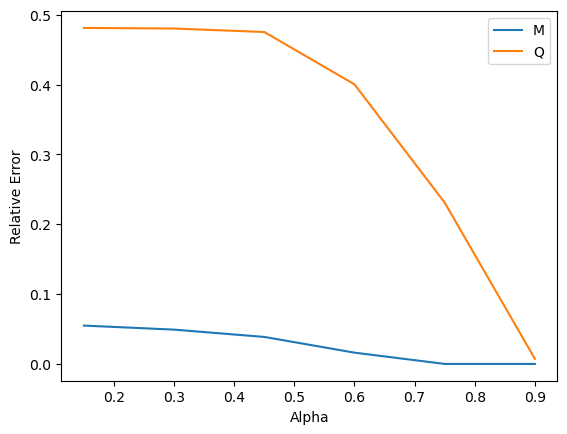

In [30]:
m_values = graph_info['M']
q_values = graph_info['Q']

for values in [m_values, q_values]:
    values.sort(key=lambda x: x[0])
    
    alphas = [x[0] for x in values]
    errors = [x[1] for x in values]

    plt.plot(alphas, errors, label='M' if values == m_values else 'Q')

plt.xlabel('Alpha')
plt.ylabel('Relative Error')
plt.legend()
plt.show()